In [4]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# Types of statistical distributions
- Normal distribution
- Chi-squared distribution
- Student's distribution
- Fisher's distribution

### How to generate distributions with Scipy

1. Create a generator to sample some random variables

2. Then you can apply various methods to our generator:

- `rvs` Random Variates: generates a sample with a fixed <b>size</b>
- `cdf` Cumulative Distribution Function: calculates a function value in a proper point
- `pdf` Probability Density Function: calculates a probability density in a proper point
- `ppf` Percent Point Function: calculates a quantile of the specified level

## Normal distribution

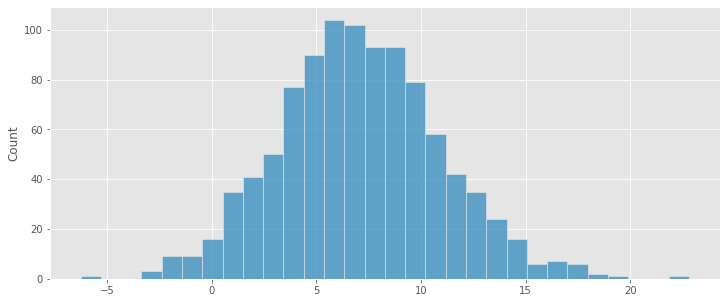

In [137]:
norm_distr = sts.norm(loc=7, scale=4) # loc - mean, scale - std. deviation
x = norm_distr.rvs(size=1000)
plt.figure(figsize=(12, 5))
sns.histplot(x);

### How probability density of normal distribution deforms in dependence of various $mu$ and $sigma$
- $mu$ (mean) shifts a distribution by X
- $sigma$ (str. dev.) makes a distribution wider if it grows or more narrow

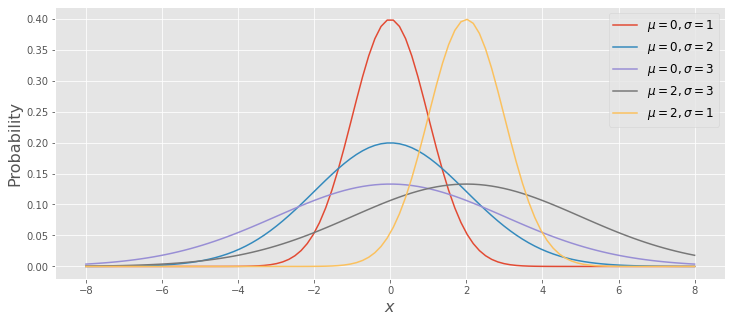

In [138]:
plt.figure(figsize=(12, 5))
x = np.linspace(-8,8,100)

par = [(0,1),(0,2),(0,3),(2,3),(2,1)]

for mu, sigma in par:
    rv = sts.norm(mu, sigma)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$\mu={},\sigma={}$".format(mu, sigma))


plt.xlabel('$x$', fontsize=16)
plt.ylabel(r'Probability', fontsize=16)
plt.legend(fontsize = 12);

### How to find a point on a probability density plot of normal distribution

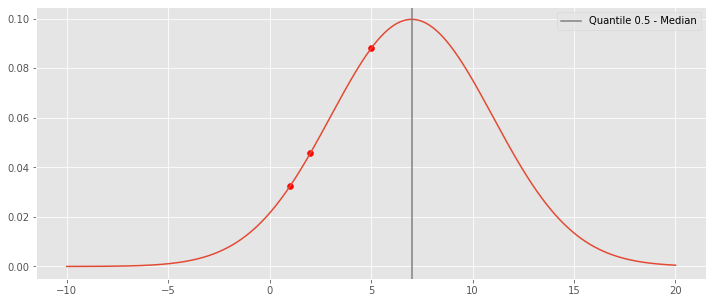

In [139]:
a = np.linspace(-10, 20, 1000)
plt.figure(figsize=(12, 5))

# Draw a probability density plot (pdf)
plt.plot(a, norm_distr.pdf(a))

# Find some points on pdf
some_points = [1,2,5]
prob_density_of_points = norm_distr.pdf(some_points)
plt.scatter(some_points, prob_density_of_points, color='red')

# Draw a quantile line
plt.axvline(norm_distr.ppf(.5), color='grey', label='Quantile 0.5 - Median')
plt.legend();

### One more transformation of normal distribution - Cumulative Distribution Function
Cumulative Distribution Function the result of integration of Normal density function
This transformation opens for as a good view on probability of Normal Distribution in a proper point

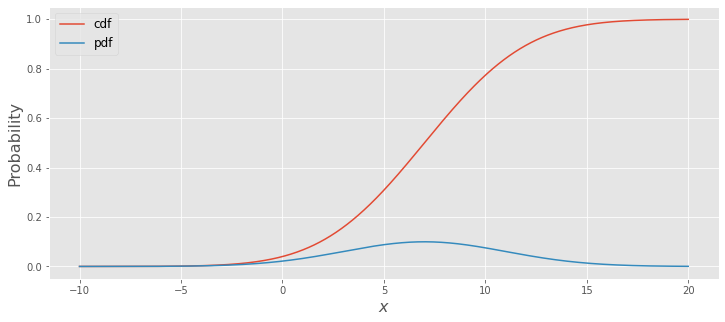

In [140]:
a = np.linspace(-10, 20, 1000)
plt.figure(figsize=(12, 5))

# Cumulative Distribution Function
plt.plot(a, norm_distr.cdf(a), label='cdf')
# Probability Density Function
plt.plot(a, norm_distr.pdf(a), label='pdf')
plt.xlabel('$x$', fontsize=16)
plt.ylabel(r'Probability', fontsize=16)
plt.legend(fontsize=12);

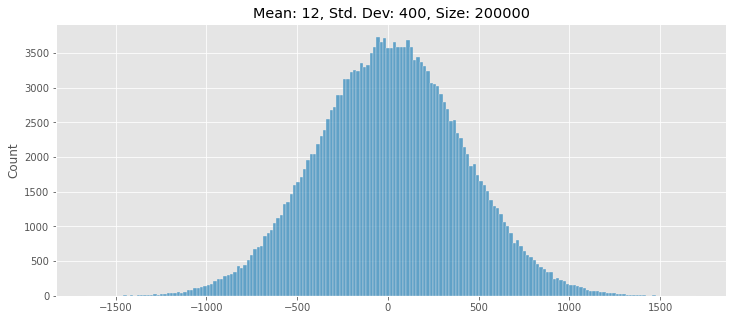

In [135]:
def norm_distr_generation(mean, std_dev, size):
    norm_distr = sts.norm(loc=mean, scale=std_dev)
    x = norm_distr.rvs(size=size)
    
    title = 'Mean: {}, Std. Dev: {}, Size: {}'.format(mean, std_dev, size)
    plt.figure(figsize=(12, 5))
    sns.histplot(x).set_title(title);
    
norm_distr_generation(12,400,200000)

## Chi-squared distribution

Chi-squared distribution with <i>k degrees of freedom</i> is the distribution of a sum of the squares of k independent <u>standard normal random variables</u>
***
It means that Chi-squared distribution can be reconstructed from a normal distribution

### Chi-squared distribution from Normal distribution

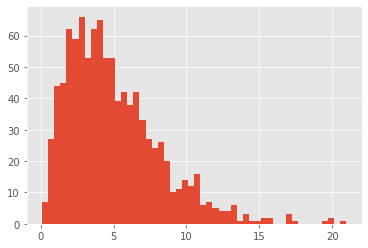

In [177]:
norm_rv = sts.norm(loc=0, scale=1)
x = norm_rv.rvs(size = (5, 1000))

y = (x**2).sum(axis=0)
plt.hist(y, bins=50);

### How Chi-squared distribution deforms in dependence of $k$
- While k grows Chi-squared distribution becomes closer to normal distribution

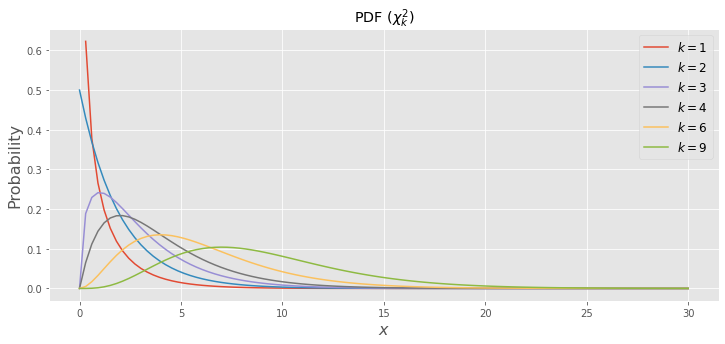

In [182]:
plt.figure(figsize=(12, 5))

x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)");

plt.xlabel('$x$', fontsize=16)
plt.ylabel(r'Probability', fontsize=16)
plt.legend(fontsize = 12);

## Student's distribution

The t distribution is a probability distribution that is used to estimate population parameters when the sample size is small and/or when the population variance is unknown.
Thar's why Student's distribution is an alternative to Normal distribution in real life.

Formula of $t$ stat: t = [ x - μ ] / [ s / sqrt( n ) ]

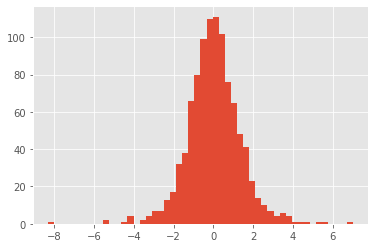

In [202]:
x0 = norm_rv.rvs(1000)

x = norm_rv.rvs(size = (5, 1000)) 
x = (x**2).sum(axis=0)

y = x0/np.sqrt(x/5)

plt.hist(y, bins=50);

### How Student's distribution deforms in dependence of $k$
- While k grows Student's distribution becomes closer to normal distribution

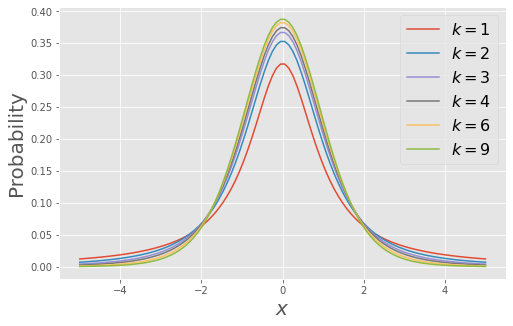

In [203]:
plt.figure(figsize=(8, 5))

x = np.linspace(-5,5,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.t(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
    
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

## Fisher's distribution

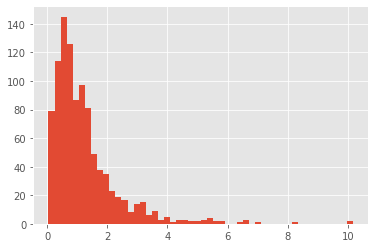

In [204]:
# хотим выборку из 1000 штук
k,m = 5,10
x1 = norm_rv.rvs(size = (k, 1000))
x2 = norm_rv.rvs(size = (m, 1000))

x1 = (x1**2).sum(axis=0)
x2 = (x2**2).sum(axis=0)

y = (x1/k)/(x2/m)

plt.hist(y, bins=50);

### How Fisher's distribution deforms in dependence of $k$ and $m$
- While k and m grow Fisher's distribution becomes closer to normal distribution

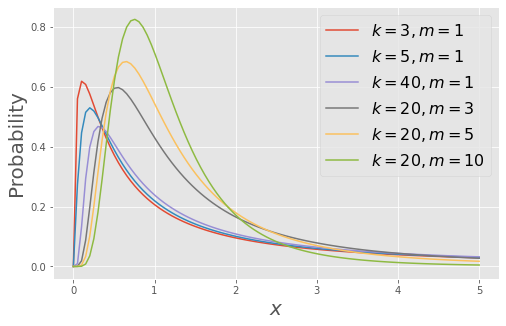

In [205]:
plt.figure(figsize=(8, 5))
x = np.linspace(0,5,100)

par = [(3,1),(5,1),(40,1),(20,3),(20,5),(20,10)]

for k,m in par:
    rv = sts.f(k,m)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k={},m={}$".format(k,m))
    
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);